# Spotify Playlist - Visualización

#### 1. Importamos las librerías necesarias.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.gridspec import GridSpec
import plotly as py
import plotly.graph_objs as go

#### 2. Cargamos nuestra base de datos.

In [12]:
df = pd.read_csv("../files/spotify_limpio.csv",index_col=0)
df.head()

,song,artist,album,duration,date_add,date_album,explicit,popularity,user,image,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Lobby Music (Original Soundtrack),Kahoot!,Lobby Music (Original Soundtrack),144008,2022-11-15T12:23:07Z,2013-03-05,False,53,Vanna,https://i.scdn.co/image/ab67616d0000b27363cd4c...,...,0.693,0,-15.818,0,0.1170,0.02440,0.890000,0.0925,0.968,119.968
1,No te olvides de poner el Where en el Delete From,Jorge Rubira,No te olvides de poner el Where en el Delete From,222057,2023-01-12T07:50:25Z,2021-03-14,False,8,Sonia,https://i.scdn.co/image/ab67616d0000b273afceff...,...,0.924,0,-3.130,1,0.1240,0.22300,0.000000,0.3450,0.560,124.786
2,Hard to Say I'm Sorry,Chicago,The Collection,232320,2022-11-07T10:05:48Z,2012-10-29,False,65,Laura,https://i.scdn.co/image/ab67616d0000b27372e167...,...,0.381,4,-8.565,1,0.0248,0.70700,0.000004,0.2490,0.188,72.332
3,Gold on the Ceiling,The Black Keys,El Camino,224333,2022-11-07T10:07:03Z,2011-12-06,False,71,Laura,https://i.scdn.co/image/ab67616d0000b2736a21b9...,...,0.833,0,-4.632,1,0.0475,0.00772,0.000079,0.0690,0.565,130.121
4,Vienna,Ultravox,This Is... 1981,278226,2022-11-07T10:08:04Z,2008-08-08,False,0,Laura,https://i.scdn.co/image/ab67616d0000b27337aac7...,...,0.614,5,-10.312,1,0.0643,0.16000,0.234000,0.1090,0.456,80.747


#### 3. Creación de gráficas para la visualización de nuestros datos.

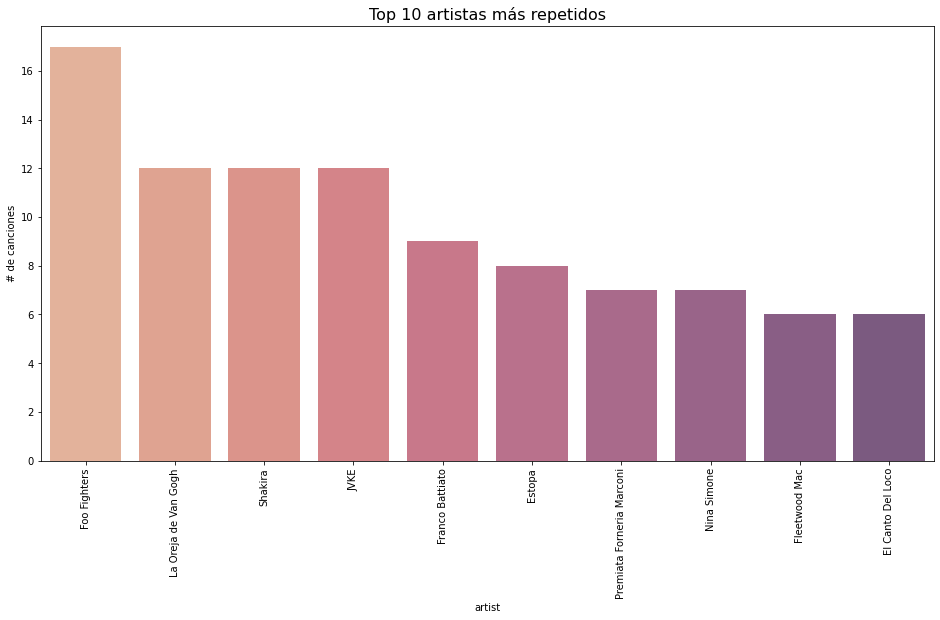

In [13]:
top10 = df.value_counts('artist')
top10 = top10[:10,]
plt.figure(figsize=(16, 8))
sns.barplot(x = top10.index, y = top10.values, alpha=0.8, palette='flare')
plt.xticks(rotation=90)
plt.title('Top 10 artistas más repetidos', fontsize=16)
plt.ylabel('# de canciones')

plt.savefig("../graphics/top-artist.png")
plt.show();

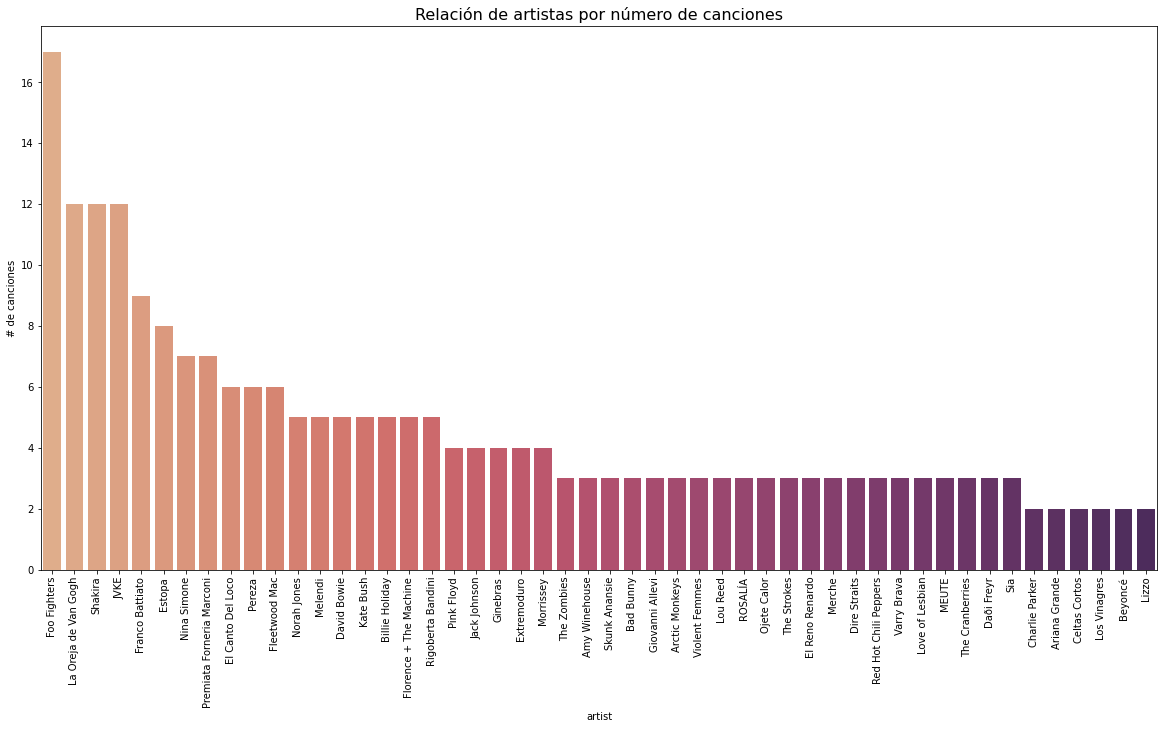

In [14]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['artist'] ,palette='flare',order=df['artist'].value_counts().index[0:50])
plt.title("Relación de artistas por número de canciones", fontsize=16)
plt.ylabel('# de canciones')

plt.savefig("../graphics/song-artist.png")
plt.show()

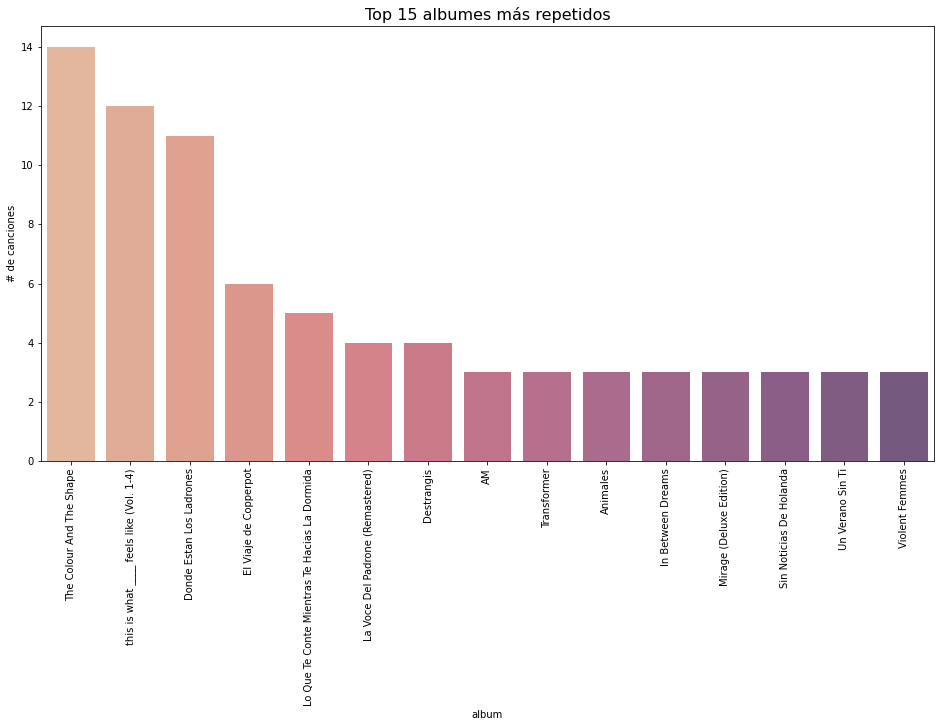

In [15]:
top10 = df.value_counts('album')
top10 = top10[:15,]
plt.figure(figsize=(16, 8))
sns.barplot(x = top10.index, y = top10.values, alpha=0.8, palette='flare')
plt.xticks(rotation=90)
plt.title('Top 15 albumes más repetidos', fontsize=16)
plt.ylabel('# de canciones')

plt.savefig("../graphics/top-albums.png")
plt.show();

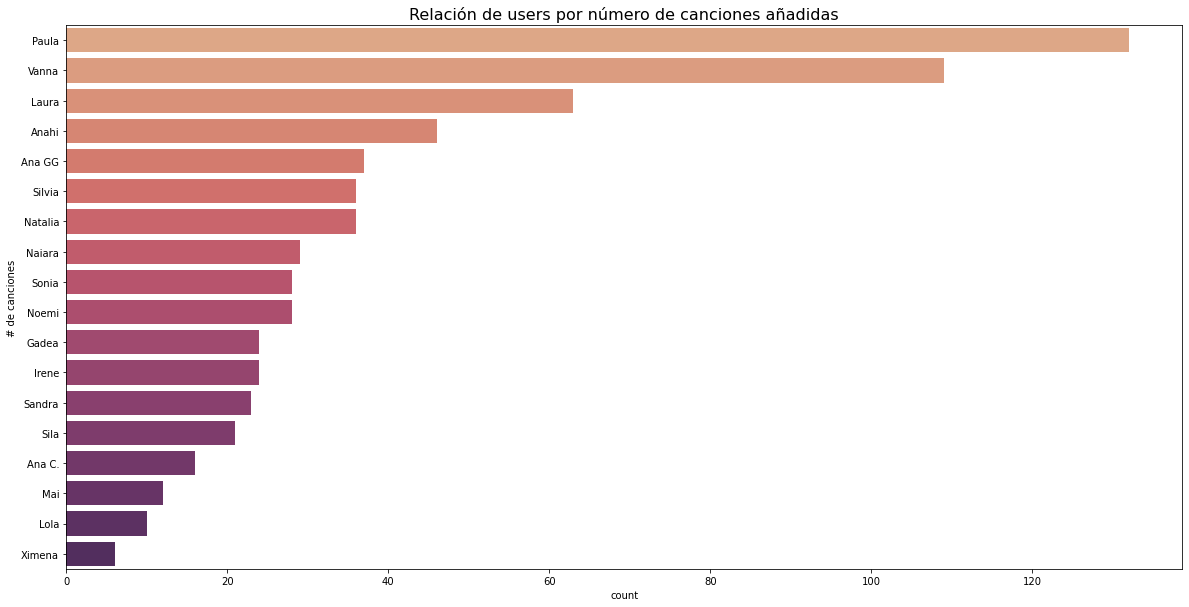

In [17]:
fig = plt.figure(figsize=(20,10))

sns.countplot(data = df , y =df['user'] ,palette='flare',order=df['user'].value_counts().index[0:50])
plt.title("Relación de users por número de canciones añadidas", fontsize=16)
plt.ylabel('# de canciones')

plt.savefig("../graphics/song-user.png")
plt.show()

#### 4. Creación de gráficas de la relación entre las usuarias y las características de las canciones.

In [19]:
# comprobamos las columnas para decidir con cuáles nos quedamos para los siguientes gráficos
df.columns

Index(['song', 'artist', 'album', 'duration', 'date_add', 'date_album',
       'explicit', 'popularity', 'user', 'image', 'uri', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [23]:
nums = df[["user", 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "popularity"]]

nums.head(3)

,user,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,Vanna,0.818,0.693,0,-15.818,0,0.1170,0.0244,0.890000,0.0925,0.968,119.968,53
1,Sonia,0.697,0.924,0,-3.130,1,0.1240,0.2230,0.000000,0.3450,0.560,124.786,8
2,Laura,0.543,0.381,4,-8.565,1,0.0248,0.7070,0.000004,0.2490,0.188,72.332,65


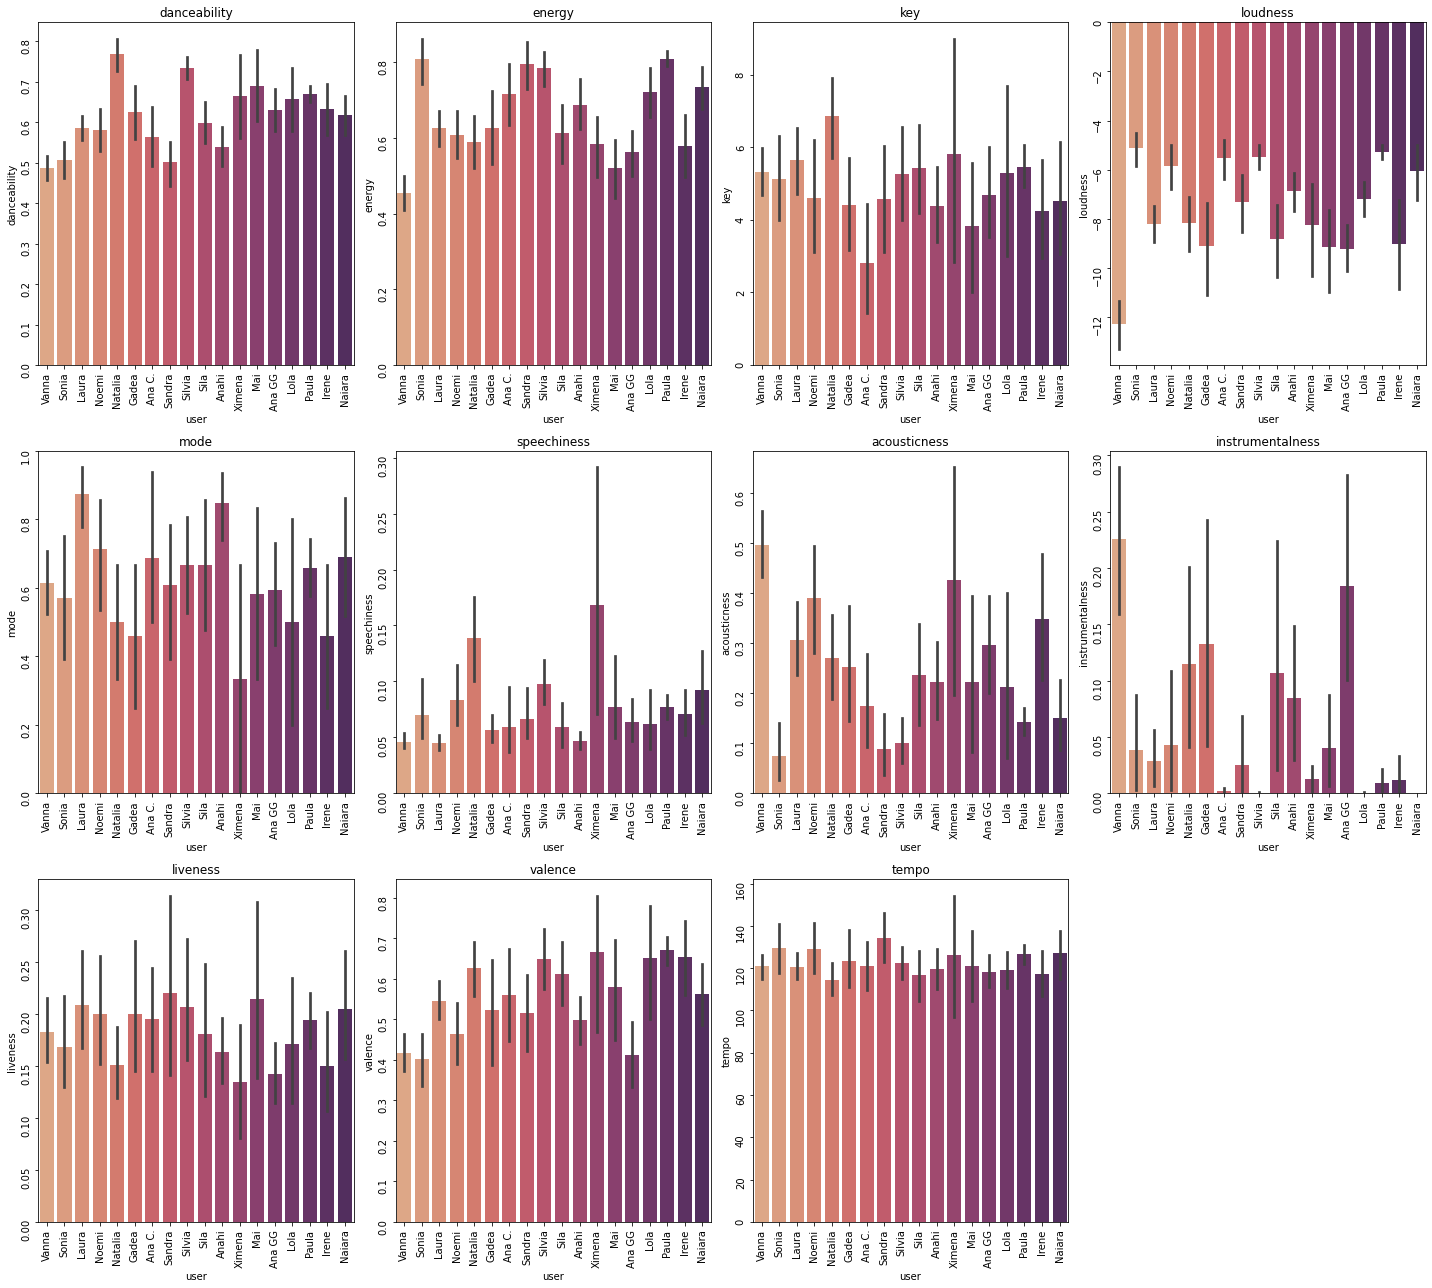

In [28]:
fig, axes = plt.subplots(nrows=3, ncols = 4, figsize = (20, 18))

axes = axes.flat

columnas = nums.columns.drop("user")

for i, col in enumerate(columnas):
    sns.barplot(data = nums, x = "user", y = col, ax = axes[i], palette='flare')
    axes[i].tick_params(rotation=90)
    axes[i].set_title(col)

fig.tight_layout()
fig.delaxes(axes[-1])
plt.show()